
## FINANCIAL ECONOMETRICS
MODULE 5 | LESSON 4

---

# **GARCH MODEL UNDER STATE SPACE MODEL CONSTRUCT**

|  |  |
|:---|:---|
|**Reading Time** | 60 minutes |
|**Prior Knowledge** | Time Series analysis, GARCH |
|**Keywords** | State Space Model, Markov Process, Kalman Filter |


---

*In this lesson, we will use a state space approach to create a GARCH model. The state space model (SSM) was originally developed as an analytical method for aerospace-related research. However, it has gained a lot of interest in engineering and finance recently. We will give a brief description of the structure of state space model and its properties. We will then introduce a popular linear state space model: Kalman Filter. We will go through the basics of the Kalman Filter. Lastly, we will combine Kalman Filter with GARCH(1,1) model to give you insight into how the combined model works.*

## **1. State Space Models**

### **1.1. The Basics of a State Space Model**

State space model (or dynamic linear model, DLM) is another popular time series model class. State space model (SSM) states that there are two types of time series variables: one that we can observe and one that we cannot observe. The ones that we cannot observe are called **states**. Those that we can observe are called **observations** instead. The states are generated by a system that describes how states evolve over time. We would like to find out the structure of this system. However, we only see observations. Observations are dependent on states with noise added. We use an observation equation to describe the relationship between observations and states. We also add a measurement noise to the observation equation to fill the gap between the observations and states. We can formalize the above concept in the following equations. Assume $y_{t}$ is the time series observation variable and $x_{t}$ is the time series state variable:

**Observation Equation:** $\hspace{3cm}  y_{t} = A_{t}x_{t} + v_{t}, \quad v_{t} \sim WN(0, V_{t}) \hspace{4cm} (1)$

where $v_{t}$ is the measurement noise.

**State Equation:** $\hspace{4.3cm}  x_{t} = \Phi_{t} x_{t-1} + w_{t}, \quad w_{t} \sim WN(0,W_{t}) \hspace{3.2cm}  (2)$

where $w_{t}$ is the system noise.

We also assume that $v_{t}$ and $v_{s}$ are independent when $t\neq s$, $w_{t}$ and $w_{s}$ are independent when $t\neq s$, and $v_{t}$ and $w_{s}$ are uncorrelated on all lags.

The above two equations form the basis of a state space model. We can also use the following graph to demonstrate the structure of a state space model.



**Figure 1: Relationship between States and Observations in a State Space Model**

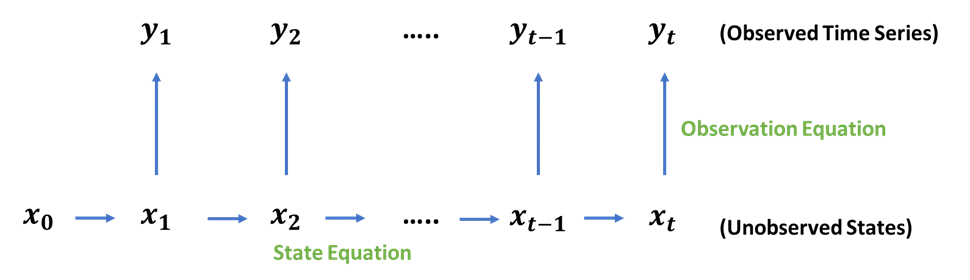


From figure 1, we can see the evolution of the state variable is represented by a state equation. This is the system or the model created by theory or process. State equation(s) can be a single equation or a set of equations to describe how states are generated. Then, we have the observation equation to connect states from a state equation to observations with a measurement noise. As for the number of state variables and observation variables, there can be more than one state variable or observation variable in a state space model. The number of state variables also do not have to be the same as the number of observation variables. As for state space model design, it can be linear or non-linear. In equation (1) and equation (2), we can see that $A_{t}$ and $\Phi_{t}$ both have time subscript. It means they can change by time. If this is the case, it is a time-varying state space model. If $A_{t}$ and $\Phi_{t}$ are fixed regardless of time (no time subscript), it is a time-invariant state space model.

We can see state space model is a very general and flexible time series modeling format. You can construct a time series model for state equation and then add an observation equation to connect states with observations or data. 

Once we build a state space model, we will use the model to achieve the following three goals:

> **a. Predicting:** forecast future values of states given all the information and data we have today <br>
> **b. Filtering:** estimate current values of states given all the information and data we have today <br>
> **c. Smoothing:** estimate pass values of states given all the information and data we have today  <br>


### **1.2. Properties of State Space Model**

Now let’s look at two key properties from the state space model.

**a. $x_{t}$ is a Markov Process**

It means $P(x_{t} | x_{t-1}, x_{t-2}, \cdots, x_{0}) = P(x_{t} | x_{t-1})$. Markov process states that the probability of the value of a state at current time only depends on the value of the most recent state. The values of the state from older times do not have an impact on today’s value. We can say that $x_{t}$ is memoryless.

**b. $y_{t}$ is fully specified given $x_{t}$**

This statement can be shown as follows: $P(y_{t} | x_{t}, x_{t-1}, \cdots, x_{0}; \ y_{t-1}, y_{t-2}, \cdots, y_{1}) = P(y_{t} | x_{t})$.

With the above two properties, we can write the joint distribution function for states and observations as follows:

$$ P(x_{0:t},y_{1:t}) = P(x_{0}) \prod_{i=1}^{t} P(x_{i}|x_{i-1}) P(y_{i}|x_{i}) $$

For $x_{0}$, we usually have to assume its value or its distribution in order to proceed with the model building.


### **1.3 Benefits of State Space Model (SSM)**

There are several reasons why state space modeling is gaining popularity among researchers. Firstly, according to the properties we explained above, we only need the most recent information to estimate the value of the current state. This property will reduce the amount of historical data needed and data storage space required to estimate SSM. 

Secondly, as we saw above, SSM allows for time varying coefficients. It is very helpful if the modeling period happens to have regime change. Time varying SSM is good for capturing this change.

Other advantages of SSM include:

> a. Use SSM to handle missing values by using forecast function. <br>
> b. Apply SSM to build a model for complex multivariate systems. <br>
> c. Use SSM to build a model for non-stationary time series. <br>

In the next section, we will introduce the Kalman filter. The Kalman filter is the most studied state space model, and we will use Kalman filter as the base state space model to build a GARCH(1,1) model.


### **1.4. Estimation of Parameters for State Space Model**

Once the state space model is specified, we can estimate the coefficients. We have to estimate these parameters: $A_{t}, \Phi_{t}, V_{t}$ and $W_{t}$.

The most popular estimation method is MLE. However, Bayesian estimation is also another viable choice for parameter estimation. Actually, Bayesian estimation is a suitable approach for a state space model given that the nature of the question of SSM is to estimate the values of states given all the observations we know. In fact, we will use a Bayesian approach to discuss our next topic: Kalman filter.


## **2. Kalman Filter**

### **2.1. Kalman Filter Model Setup**

Kalman filter is a linear state space model with normal (Gaussian) noise. It has been very popular due to its recursive method that can avoid heavy computing and storage issues happening to other statistical analysis methods. In this section, we will study a time invariant multivariate Kalman filter model. The properties of the Kalman filter derived in this section still apply to Kalman filter models where some or all of the parameters are time varying. Let’s write down the model and discuss its properties.

Assume we have $x_t$ as a $r\times 1$ state vector and $y_t$ as a $n\times 1$ observation vector. The model can be written as follows:

**Observation Equation:** $y_{t} = F' x_{t} + v_{t}, \ \ v_{t}$ is the measurement noise.

**State Equation:** $x_{t} = G x_{t-1} + w_{t}, \ \ w_{t}$ is the system noise.   

where $v_{t} \sim N(0,V)$  and  $w_{t} \sim N(0,W)$.

We also assume the initial value of $x_{t}$ to be $x_{0}$ and $x_{0}$ has the $x_{0} \sim N(m_{0},C_{0})$ distribution and $m_{0}$ and $C_{0}$ are known. 

Following the assumption from the last section, we still assume that $v_{t}$ and $v_{s}$ are independent when $t \neq s, \ w_{t}$ and $w_{s}$ are independent when $t \neq s$, and $v_{t}$ and $w_{s}$ are uncorrelated on all lags. 

In the model, $F$ is a $r \times n$ matrix, and it is called an observation matrix or design matrix. $G$ is a $r \times r$ matrix and it is called a state transition matrix. 

Given so many variables we have mentioned so far, we will summarize these variables in the following list:

> $x_{t}$: $r \times 1$ state vector at time $t$; <br>
> $y_{t}$: $n \times 1$ observation vector at time $t$; <br>
> $F$: $r \times n$ observation matrix between observation and state at time $t$; <br>
> $G$: $r \times r$ state transition matrix between current state at $t$ and prior state at $t-1$; <br>
> $v_{t}$: measurement noise from multivariate normal distribution; <br>
> $w_{t}$: system noise from multivariate normal distribution; <br>
> $V$: variance-covariance matrix for multivariate normal distribution where measurement noise is from; <br>
> $W$: variance-covariance matrix for multivariate normal distribution where system noise is from; <br>
> $m_{0}$: mean value of multivariate normal distribution from initial state, $x_{0}$; <br>
> $C_{0}$: variance-covariance matrix of multivariate normal distribution from initial state, $x_{0}$.  <br>


### **2.2. Kalman Filter Model Derivation**

In the last section, we went through the Kalman filter model setup and described all the variables in this model. In this section, we are going to explain how Kalman filter model works and what the key results are from this model. We are going to use a Bayesian approach to explain how a Kalman filter model works.

In the previous section, we mentioned that the concept of using all the information from the past and new data to infer the unobserved state in a state space model is very similar to the Bayesian updating process. Let’s try to demonstrate what a state space model is looking for in terms of a Bayes theorem. 

For a Kalman filter model, we can express it using the following Bayes theorem formula.

$$ P(x_{t}|y_{t}, D_{t-1}) = \frac{P(y_{t}|x_{t})P(x_{t}|D_{t-1})}{P(y_{t})} $$

Where $x_{t}$ is current state, $y_{t}$ is current observation, $D_{t-1}$ is all the pass information, including pass states and pass observations.

Here is the breakdown of prior probability, likelihood function, and posterior probability.

> Posterior probability: $P(x_{t}|y_{t},D_{t-1})$ <br>
> Likelihood function: $P(y_{t}|x_{t})$ <br>
> Prior probability: $P(x_{t}|D_{t-1})$ <br>

The above equation says the probability of getting the value of state $x_{t}$ at time $t$, given we know the current observation $y_{t}$ and all our prior knowledge $D_{t-1}$, is the multiplication of the likelihood of $y_{t}$ happening given $x_{t}$ and the probability of the state $x_{t}$ happening given all our prior knowledge $D_{t_1}$. We also normalize the multiplication by dividing the probability of $y_{t}$ happening. This is the process of  updating the value of current state $x_{t}$ with the new information $y_{t}$. 

With the above Bayesian equation and some mathematical manipulations, we can derive the following results:

> **Prior:**  $ x_{t}|D_{t-1} = x_{t}|y_{1:t-1} \sim N(a_{t},R_{t}) $ <br>
> Where $a_{t} = G m_{t-1}$ and $R_{t} = G' C_{t-1} G + W$ <br>

> **Likelihood:** $ y_{t}|x_{t} \sim N(F x_{t},V) $

> **One-Step Forecast:**  $ y_{t}|y_{t-1} \sim N(f_{t},Q_{t}) $ <br>
> Where $f_{t} = Fa_{t}$ and $Q_{t} = F' R_{t}F + V$

> **Posterior:** $ x_{t}|D_{t} = x_{t}|y_{1:t} \sim N(m_{t},C_{t}) $ <br>
> Where 
> $m_{t} = a_{t} + K_{t} e_{t}$ <br>
> $C_{t} = R_{t} - K_{t}' Q_{t} K_{t} =(1-K_{t}F)R_{t}$ <br>
> $K_{t} = R_{t} F Q_{t}^{-1}$  ($K_{t}$ is called Kalman gain matrix) <br>
> $e_{t} = y_{t} - f_{t}$ and $e_{t} \sim N(0,Q_{t})$ <br>


The above posterior result is called Kalman filter recursion. Remember there are three goals for the state space model described before. This result is to achieve the filtering goal: Use all the past information and new data to estimate the current value of the state. We use the mean of the posterior distribution $m_{t}$ as our estimated value of the current state $x_{t}$, given all the information we have.

Let’s look at the above result intuitively. By looking at the mean of the posterior equation, we can see $m_{t}$ is a linear combination of previous state $m_{t-1}$ and new information $y_{t}$. We can view the estimated value of the current state as the weighted average of the value of the past state and new information. $K_{t}$ (Kalman gain matrix) is one of the weights in $m_{t}$ formula. We can see $K_{t}$ as a tuning factor to decide if more weight should be put on new information or not. The higher the value of $K_{t}$, the more weight the model puts on new information. Also, the estimated current state is only dependent on the state value of the last period and new value; there is no need to have all the historical data to update the current state. This recursive method of updating current state value with new information and only the last period of the state makes the forecast of Kalman filter a lot easier than other methods. 


### **2.3 Forecasting with Kalman Filter**

One key reason to learn Kalman filter is to use it to conduct forecasting. Forecasting includes predicting $x_{t+d}$ and $y_{t+d}$ given $y_{1:t}$. We can apply the result from the last section to conduct forecasting.


When $d = 1$, the forecasting result can be derived from prior and one-step forecast equations from last section.

> **State at $t+1$:** <br>
> $x_{t+1} = Gm_{t}$ forecast state <br>
> $R_{t+1}  =G' C_{t}G + W$ forecast variance of state <br>

> **Observation at $t+1$:** <br>
> $y_{t+1} = F x_{t+1}$ forecast observation <br>
> $Q_{t+1} = F' R_{t+1}F + V$ forecast variance of observation <br>

<br>
When $d > 1$, we can use a recursive method to obtain the result as follows:

> **State at $t+d$:** <br>
> $x_{t+d} = Gm_{t+d-1}$  forecast state <br>
> $R_{t+d} = G' C_{t+d-1}G + W$ forecast variance of state <br>

> **Observation at $t+d$:** <br>
> $y_{t+d} = F x_{t+d}$ forecast observation <br>
> $Q_{t+d} = F' R_{t+d}F + V$ forecast variance of observation <br>


## **3. Use Kalman Filter to Fit GARCH(1,1) Model**

In this section, we are going to apply Kalman filter to build a GARCH(1,1) model. We have studied in the previous lessons that GARCH model has conditional heteroskedasticity feature on the observation level. Hence, we need to incorporate this feature to a Kalman filter model. We can write the model as follows:

$$ \begin{align*}
  y_{t}  &= F x_{t} + z_{t} \\
  x_{t}  &= G x_{t-1} + w_{t}, \text{ where } w_{t} \sim N(0,W) \\
  z_{t}  &= s_{t} \epsilon_{t}, \text{ where } \epsilon_{t} \sim N(0,1) \\
  s_{t}^{2}  &= \alpha_{0} + \alpha_{1} z_{t-1}^{2} + \beta_{1} s_{t-1}^{2}
\end{align*} $$

The first two equations from the above equation system are from the Kalman filter. The first one is the observation equation and the second one is the state equation. In the observation equation, we can see the measurement noise has a further specification from the third and fourth equations. The third and fourth equations are the section for GARCH. The measurement noise is now following standard normal GARCH(1,1) set up. 

From the above system of equations for Kalman filter-GARCH(1,1) model, we can do some manipulation and obtain the posterior and one-step forecast result.

> **Posterior for state:**  $ x_{t}|y_{1:t} \sim N(m_{t},C_{t}) $  <br>
> Where all the parameters are the same as standard Kalman filter model

> **One-step forecast for observation:**  $ y_{t}|y_{t-1} \sim N(f_{t},Q_{t}) $  <br>
> Where $f_{t} = Fa_{t}$ and $Q_{t} = F' R_{t} F + s_{t}^{2}$

We can see from the above result, the only difference between the standard Kalman filter model and Kalman filter-GARCH(1,1) model is the $s_{t}^{2}$ in $Q_{t}$, the variance for observation.

Once we have the posterior and one-step forecast equations set up, we can use either Gibbs sampling or Metropolis-Hasting sampling method to sample unknown parameters. For unknown state vectors, we use a technique called forward filtering and backward sampling (FFBS) to sample. FFBS was proposed by Carter and Kohn as well as Fruhwirth-Schnatter. Most statistical software will provide FFBS sampling function for use. For more information on how to sample, Omar provides detailed steps to sample prior distribution and simulate data with FFBS on Kalman filter GARCH(1,1) model.


## **4. Shiny Application For GARCH(1,1) Model**

In this module, we provided a Shiny application to build a GARCH(1,1) model on an asset return.

[Click here to access the application.](https://worldquantuniversity.shinyapps.io/3FE-Module-5-Lesson-4/?_ga=2.220777432.1981594217.1661291782-1173458961.1656095235)First, you choose an asset return for the model. There are three choices: Google stock price daily return, EUR/USD daily return, and U.S. 10-year Treasury bond yield daily return. You then use the error distribution for a GARCH(1,1) model. There are four choices: normal, Student's t, skew normal, and skew Student's t.

The data summary tab will show the time series plot, histogram, and QQ plot of the selected asset return. The squared return summary tab will show the time series plot for the squared return. This tab will also provide ACF and PACF plots for both daily returns and squared daily returns of the selected asset return. The last tab will present the GARCH(1,1) model result and model diagnostic information.

## **5. Conclusion**

In this lesson, we went through the theory of state space model. We talked about the basics of state space model, its properties, its benefits, and its estimation method. We then discussed a popular linear state space model, Kalman Filter. We explained how Kalman Filter works, how to derive the model and how to use it to forecast. After learning Kalman Filter, we combined Kalman Filter with GARCH(1,1) model and gave a brief model setup for Kalman Filter-GARCH(1,1) model. This lesson concludes our study on conditional heteroskedasticity in time series data. In the next module, we will dive into the method to check for stationary for a time series. We will also look into the relationship of two time series. 


## **References**

- Carter, Chris, and Robert Kohn. "On Gibbs Sampling for State Space Models." Biometrika, vol. 81, 1994, pp. 541–553.

- Fruhwirth-Schnatter, Sylvia. "Data Augmentation and Dynamic Linear Models." Journal of Time Series Analysis, vol. 15, 1994, pp. 183–202.

- Omar, Zayd. State-Space Models with GARCH Errors: Application to Health Data. 2019. McGill University, Master's thesis.


---
Copyright 2023 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
